In [1]:
import umap
import hdbscan
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Dimension reduction and clustering libraries
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
sns.set(context= 'notebook', style= 'white', rc={'figure.figsize':(14,10)})
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excel_Data
df = pd.read_csv ("beta_post_Funnorm_PPMI_EPICn524final030618.csv")
df = df.round(decimals = 4)
df.head(2)


Z:\PPMI_Data\Excel_Data


,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,200973410167_R05C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
cg14817997,0.8340,0.8492,0.7730,0.8853,0.7725,0.7564,0.7198,0.7759,0.7689,0.7594,...,0.7882,0.8389,0.8453,0.7704,0.8529,0.7838,0.8069,0.8757,0.6613,0.7379
cg26928153,0.9456,0.9485,0.9622,0.9440,0.9263,0.9561,0.9130,0.9560,0.9571,0.8976,...,0.9512,0.9590,0.9571,0.9547,0.9478,0.9581,0.9480,0.9424,0.9550,0.9463


In [3]:
df.index.name ='CpG'
df.reset_index(inplace=True)
df.head(2)

,CpG,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
0,cg14817997,0.8340,0.8492,0.7730,0.8853,0.7725,0.7564,0.7198,0.7759,0.7689,...,0.7882,0.8389,0.8453,0.7704,0.8529,0.7838,0.8069,0.8757,0.6613,0.7379
1,cg26928153,0.9456,0.9485,0.9622,0.9440,0.9263,0.9561,0.9130,0.9560,0.9571,...,0.9512,0.9590,0.9571,0.9547,0.9478,0.9581,0.9480,0.9424,0.9550,0.9463


In [4]:
df.shape

(864067, 525)

In [5]:
df1 = pd.read_csv ("CpG_List_HavingCorres_GeneChr.csv")
df = pd.merge (df1, df, on= "CpG", how= "inner")
df.head(2)

,CpG,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
0,cg18478105,0.0126,0.0143,0.0155,0.0107,0.0100,0.0093,0.0134,0.0109,0.0085,...,0.0104,0.0160,0.0090,0.0106,0.0111,0.0105,0.0111,0.0116,0.0124,0.0136
1,cg09835024,0.0222,0.0295,0.0274,0.0213,0.0228,0.0442,0.0383,0.0161,0.0153,...,0.0197,0.0256,0.0227,0.0228,0.0212,0.0218,0.0247,0.0175,0.0198,0.0239


In [6]:
df1 = pd.read_csv ("CpGList_inChroXY.csv")
df = df.loc[df.index.difference(df1.index), ]
df.shape

(824439, 525)

In [7]:
dft = df.transpose()
dft.head(2)

,13523,13524,13525,13526,13527,13528,13529,13530,13531,13532,...,837952,837953,837954,837955,837956,837957,837958,837959,837960,837961
CpG,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,cg21490846,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
200973410159_R03C01,0.3642,0.1582,0.3494,0.015,0.0143,0.8999,0.0699,0.7524,0.0111,0.0147,...,0.8066,0.4693,0.3718,0.839,0.9298,0.8871,0.9113,0.8647,0.0615,0.6952


In [8]:
dft.rename(columns=dft.iloc[0], inplace = True)


In [9]:
dft.index.name ='CpG'
dft.reset_index(inplace=True)
dft.head(2)

,CpG,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
0,CpG,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
1,200973410159_R03C01,0.3642,0.1582,0.3494,0.015,0.0143,0.8999,0.0699,0.7524,0.0111,...,0.8066,0.4693,0.3718,0.839,0.9298,0.8871,0.9113,0.8647,0.0615,0.6952


In [10]:
dft = dft.drop ([0], axis = 0)
dft.head(2)

,CpG,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
1,200973410159_R03C01,0.3642,0.1582,0.3494,0.015,0.0143,0.8999,0.0699,0.7524,0.0111,...,0.8066,0.4693,0.3718,0.839,0.9298,0.8871,0.9113,0.8647,0.0615,0.6952
2,200991620021_R01C01,0.0328,0.1336,0.4513,0.017,0.0174,0.8938,0.1436,0.7146,0.0111,...,0.8088,0.4602,0.397,0.81,0.9008,0.89,0.9134,0.8209,0.1167,0.6173


In [11]:
dft.rename (columns = {"CpG" : "Sentrix"}, inplace = True)
dft.head(2)

,Sentrix,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
1,200973410159_R03C01,0.3642,0.1582,0.3494,0.015,0.0143,0.8999,0.0699,0.7524,0.0111,...,0.8066,0.4693,0.3718,0.839,0.9298,0.8871,0.9113,0.8647,0.0615,0.6952
2,200991620021_R01C01,0.0328,0.1336,0.4513,0.017,0.0174,0.8938,0.1436,0.7146,0.0111,...,0.8088,0.4602,0.397,0.81,0.9008,0.89,0.9134,0.8209,0.1167,0.6173


In [12]:
df2 = pd.read_csv ("SentrixHYS0_APPRDX.csv")
df2.head(2)

,Sentrix,APPRDX
0,200973410159_R03C01,2
1,200989060135_R07C01,2


In [13]:
df3 = pd.merge (df2, dft, on= "Sentrix", how= "inner")
df3.head(2)

,Sentrix,APPRDX,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
0,200973410159_R03C01,2,0.3642,0.1582,0.3494,0.015,0.0143,0.8999,0.0699,0.7524,...,0.8066,0.4693,0.3718,0.839,0.9298,0.8871,0.9113,0.8647,0.0615,0.6952
1,200989060135_R07C01,2,0.0329,0.0361,0.2746,0.0113,0.0122,0.8856,0.0522,0.7883,...,0.8299,0.7964,0.2522,0.8095,0.9109,0.8816,0.8735,0.83,0.0783,0.6201


In [14]:
df3.shape

(125, 824441)

In [15]:
df_data = df3.drop(['APPRDX', 'Sentrix'], axis=1)
df_data.head(2)

,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,cg21490846,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
0,0.3642,0.1582,0.3494,0.015,0.0143,0.8999,0.0699,0.7524,0.0111,0.0147,...,0.8066,0.4693,0.3718,0.839,0.9298,0.8871,0.9113,0.8647,0.0615,0.6952
1,0.0329,0.0361,0.2746,0.0113,0.0122,0.8856,0.0522,0.7883,0.0099,0.0236,...,0.8299,0.7964,0.2522,0.8095,0.9109,0.8816,0.8735,0.83,0.0783,0.6201


In [16]:
df_targets = df3[['APPRDX']]

In [17]:
colors = {1:"red", 2: "green"}

In [18]:
clusterable_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2,random_state=42,).fit_transform(df_data)

In [19]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='r', markersize=15, color='floralwhite'),
                Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='g', markersize=15, color='floralwhite')]

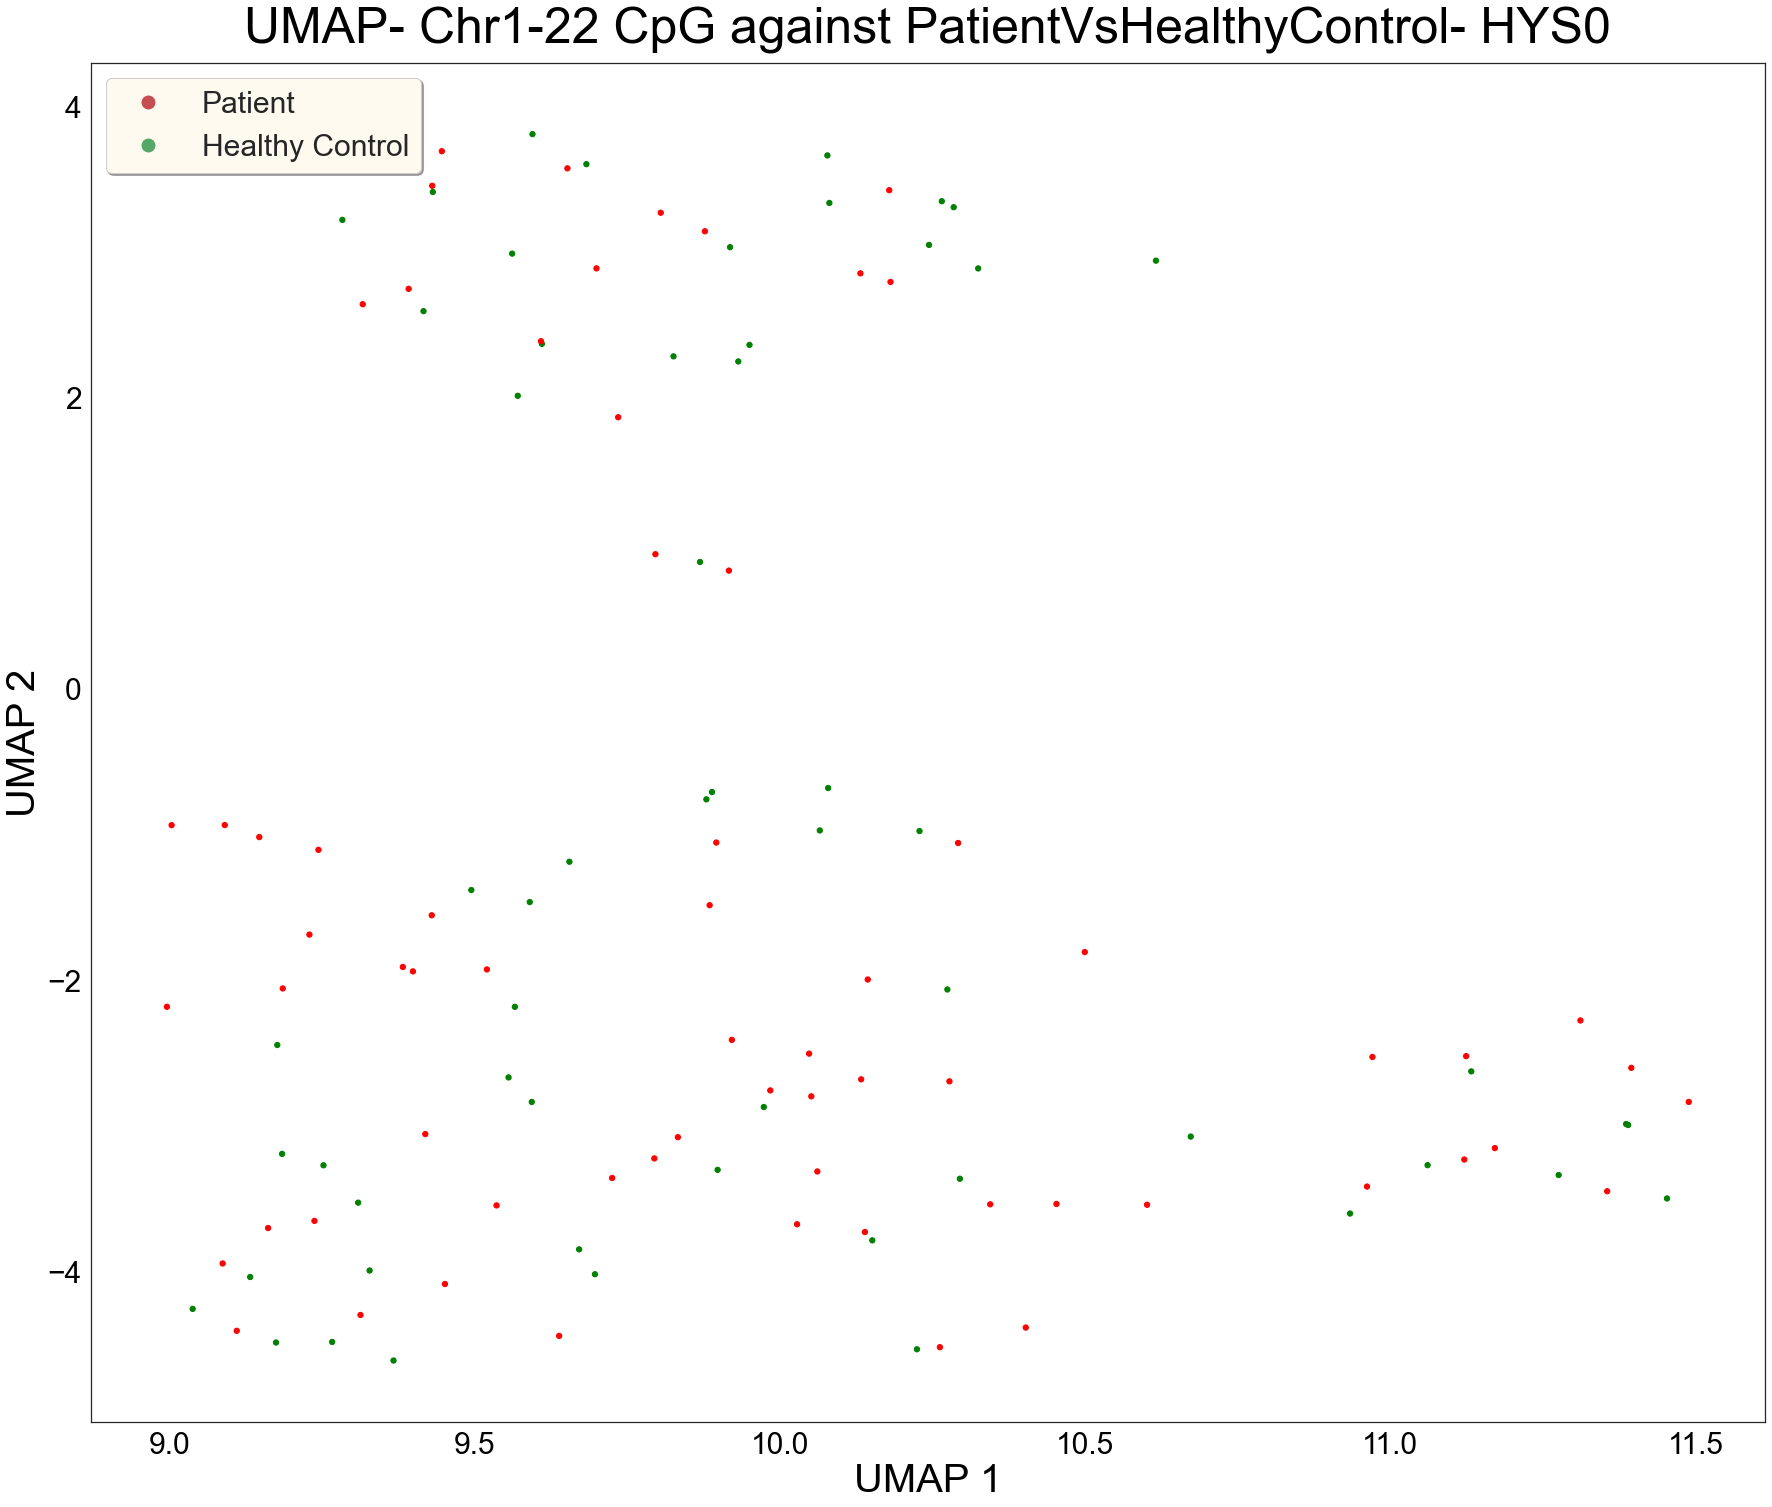

In [21]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
c=df_targets['APPRDX'].map(colors), s=28, cmap="Spectral");
plt.rcParams["figure.figsize"] = [30,25]
plt.title(label= "UMAP- Chr1-22 CpG against PatientVsHealthyControl- HYS0", fontsize=50, color='black', pad= 20)
plt.xlabel('UMAP 1', fontsize=40, color='black')
plt.ylabel('UMAP 2', fontsize=40, color='black')
plt.xticks(fontsize=30, color='black')
plt.yticks(fontsize=30, color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper left',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 30})
plt.savefig("UMAP_Chr1_22_CpG_against_HYS0_PatientVsHealthy.pdf", format="pdf")
plt.show()